In [1]:
import pandas as pd

C:\Users\91705\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('recipes_w_search_terms.csv')

# Display the first few rows of the dataframe
df.sample(5)

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
243448,509060,Apple Stuffed Acorn Squash,101 Things To Do With Apples\r\n\r\n\r\nServes 4,"['acorn squash', 'butter', 'apple', 'raisins',...","[""1 acorn squash"",""1 teaspoon butte...",1 (181 g),4,"['Preheat oven to 400.', 'Halve squash and rem...","['60-minutes-or-less', 'time-to-make', 'course...","{'low-calorie', 'low-sodium', 'healthy', 'low-..."
282155,486743,Rich and Nutty Brown Butter Corn Bread With Fr...,In 'In the Kitchen with a Good Appetite' by Me...,"['unsalted butter', 'ear of corn', 'pure maple...","[""8 tablespoons unsalted butter"",""1 ...",1 (147 g),6,"['Preheat the oven to 375°.', 'In a 9-inch ove...","['60-minutes-or-less', 'time-to-make', 'course...","{'side', 'bread'}"
48235,56562,Ginger-Kiwi Cheesecake,Here's a great cheesecake for company or famil...,"['gingersnap crumbs', 'crystallized ginger', '...","[""2/3 cup gingersnap crumbs"",""1/2 cup m...",1 (196 g),10,"['Preheat oven to 350 degrees.', 'In a medium ...","['weeknight', 'time-to-make', 'course', 'main-...",{'dessert'}
413676,253012,Easy Enchiladas,Quick and easy,"['ground meat', 'onion', 'cheddar cheese', 'to...","[""1 1/2 lbs ground meat"",""3/4 cup onio...",1 (158 g),6,"['Saute ground meat and onion.', 'Add cheddar ...","['60-minutes-or-less', 'time-to-make', 'course...",{'dinner'}
203136,345393,Nacho Mac N Cheese,Adapted from Simple & Delicious Nov-Dec 2007. ...,"['pasta', 'ground beef', 'butter', 'flour', 't...","[""3 cups uncooked pasta (1 lb)"",""1 lb ...",1 (324 g),8,"['Preheat oven to 350°F.', 'Boil pasta to al d...","['60-minutes-or-less', 'time-to-make', 'course...",{'dinner'}


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494963 entries, 0 to 494962
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   494963 non-null  int64 
 1   name                 494963 non-null  object
 2   description          485362 non-null  object
 3   ingredients          494963 non-null  object
 4   ingredients_raw_str  494963 non-null  object
 5   serving_size         494963 non-null  object
 6   servings             494963 non-null  int64 
 7   steps                494963 non-null  object
 8   tags                 494963 non-null  object
 9   search_terms         494963 non-null  object
dtypes: int64(2), object(8)
memory usage: 37.8+ MB


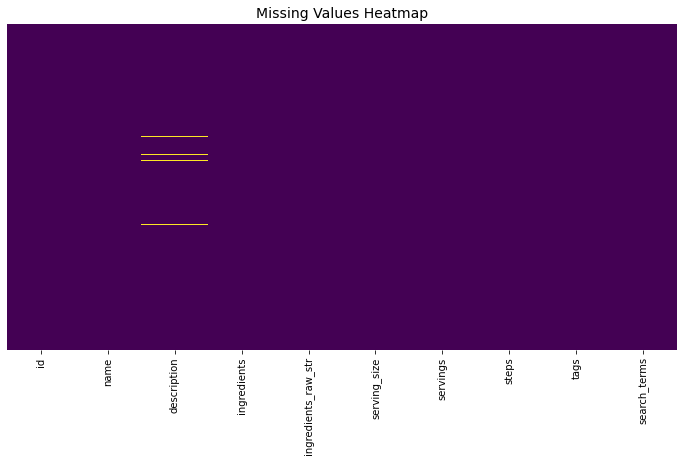

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual dataset file)
df = pd.read_csv('recipes_w_search_terms.csv')  

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

# Add title
plt.title("Missing Values Heatmap", fontsize=14)

# Show plot
plt.show()

In [5]:
# Calculate the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Convert to a DataFrame for better readability
missing_df = pd.DataFrame({"Column": df.columns, "Missing Percentage": missing_percentage})

# Display only columns with missing values
missing_df = missing_df[missing_df["Missing Percentage"] > 0].sort_values(by="Missing Percentage", ascending=False)

# Calculate the overall percentage of missing values
overall_missing_percentage = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

# Print results
print("Percentage of Missing Values in Each Column:\n")
print(missing_df)
print("\nOverall Percentage of Missing Values in the Dataset: {:.2f}%".format(overall_missing_percentage))

Percentage of Missing Values in Each Column:

                  Column  Missing Percentage
description  description            1.939741

Overall Percentage of Missing Values in the Dataset: 0.19%


In [6]:
import pandas as pd

df_cleaned = df.dropna(subset=['description'])

# Display information about the cleaned dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485362 entries, 0 to 494962
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   485362 non-null  int64 
 1   name                 485362 non-null  object
 2   description          485362 non-null  object
 3   ingredients          485362 non-null  object
 4   ingredients_raw_str  485362 non-null  object
 5   serving_size         485362 non-null  object
 6   servings             485362 non-null  int64 
 7   steps                485362 non-null  object
 8   tags                 485362 non-null  object
 9   search_terms         485362 non-null  object
dtypes: int64(2), object(8)
memory usage: 40.7+ MB


## Analysis of Cleaned Data

In [7]:
# Understanding Ingredients and Recipe Popularity

from collections import Counter
import ast

# Function to safely parse lists
def safe_eval(val):
    if isinstance(val, str):  # Only parse if it's a string
        try:
            parsed_val = ast.literal_eval(val)
            if isinstance(parsed_val, list):  # Ensure it's a list
                return parsed_val
        except (ValueError, SyntaxError):
            return [val]  # Keep the original string if parsing fails
    return val  # If already a list, return as is

# Apply function to convert 'ingredients' column to lists
df_cleaned['ingredients'] = df_cleaned['ingredients'].apply(safe_eval)

# Flatten all ingredients into a single list
all_ingredients = [ingredient.lower().strip() for sublist in df_cleaned['ingredients'] if isinstance(sublist, list) for ingredient in sublist]

# Get the most common ingredients
common_ingredients = Counter(all_ingredients).most_common(20)

# Print the 20 most common ingredients
print(common_ingredients)


<ipython-input-7-9261ba047e0c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ingredients'] = df_cleaned['ingredients'].apply(safe_eval)


[('salt', 187667), ('butter', 125909), ('sugar', 107158), ('onion', 82528), ('eggs', 77443), ('water', 76229), ('olive oil', 71757), ('flour', 59101), ('garlic cloves', 56844), ('milk', 56348), ('pepper', 46417), ('all-purpose flour', 41144), ('brown sugar', 39849), ('baking powder', 37726), ('egg', 37573), ('garlic', 32415), ('vanilla', 31827), ('baking soda', 31522), ('salt and pepper', 31135), ('parmesan cheese', 30557)]


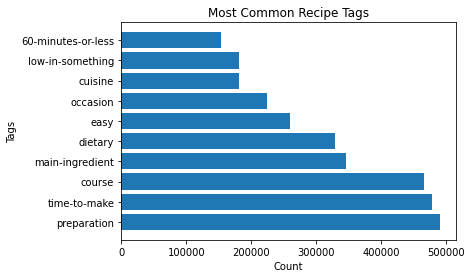

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

# Convert string representation of sets to actual sets
df['tags'] = df['tags'].apply(ast.literal_eval)

# Flatten all tags into a single list
all_tags = [tag for sublist in df['tags'] for tag in sublist]

# Get the most common tags
common_tags = Counter(all_tags).most_common(10)

# Plot most common tags
tags, counts = zip(*common_tags)
plt.barh(tags, counts)
plt.xlabel("Count")
plt.ylabel("Tags")
plt.title("Most Common Recipe Tags")
plt.show()


<ipython-input-9-78857eebae4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['steps'] = df_cleaned['steps'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
<ipython-input-9-78857eebae4c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['step_count'] = df_cleaned['steps'].apply(lambda x: len(x) if isinstance(x, list) else 0)


count    485362.000000
mean          6.689117
std           4.261623
min           0.000000
25%           4.000000
50%           6.000000
75%           8.000000
max         107.000000
Name: step_count, dtype: float64


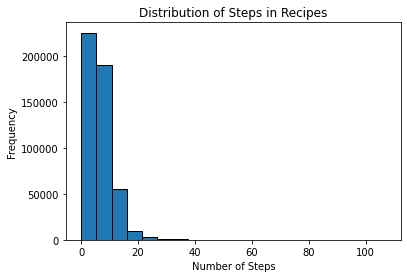

In [9]:
import ast
import matplotlib.pyplot as plt

# Convert string representation of lists to actual lists
df_cleaned['steps'] = df_cleaned['steps'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate step count for each recipe
df_cleaned['step_count'] = df_cleaned['steps'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Summary statistics
print(df_cleaned['step_count'].describe())

# Visualizing step count distribution
plt.hist(df_cleaned['step_count'], bins=20, edgecolor='black')
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.title("Distribution of Steps in Recipes")
plt.show()


Analysis: Most Commonly Used Ingredients

<ipython-input-10-7d8c9214db22>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ingredients'] = df_cleaned['ingredients'].apply(safe_eval)


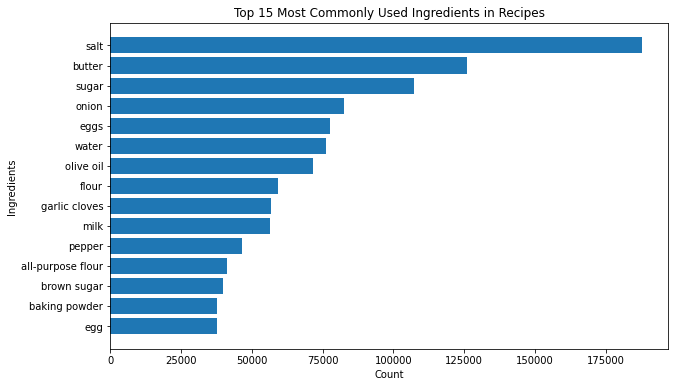

In [10]:
from collections import Counter
import ast
import matplotlib.pyplot as plt

# Safely convert string representation of lists to actual lists
def safe_eval(val):
    if isinstance(val, str):  
        try:
            parsed_val = ast.literal_eval(val)
            if isinstance(parsed_val, list):  
                return parsed_val
        except (ValueError, SyntaxError):
            return []
    return val if isinstance(val, list) else []

# Apply function to convert 'ingredients' column
df_cleaned['ingredients'] = df_cleaned['ingredients'].apply(safe_eval)

# Flatten all ingredients into a single list
all_ingredients = [ingredient.lower().strip() for sublist in df_cleaned['ingredients'] for ingredient in sublist]

# Get the most common ingredients
common_ingredients = Counter(all_ingredients).most_common(15)

# Plot the most common ingredients
if common_ingredients:
    ingredients, counts = zip(*common_ingredients)
    plt.figure(figsize=(10, 6))
    plt.barh(ingredients[::-1], counts[::-1])  # Reverse for better visualization
    plt.xlabel("Count")
    plt.ylabel("Ingredients")
    plt.title("Top 15 Most Commonly Used Ingredients in Recipes")
    plt.show()
else:
    print("No common ingredients found. Please check data parsing.")


Analysis: Distribution of Recipe Complexity (Based on Steps)

<ipython-input-11-99f8f91ef428>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['steps'] = df_cleaned['steps'].apply(safe_eval)
<ipython-input-11-99f8f91ef428>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['step_count'] = df_cleaned['steps'].apply(lambda x: len(x) if isinstance(x, list) else 0)
<ipython-input-11-99f8f91ef428>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

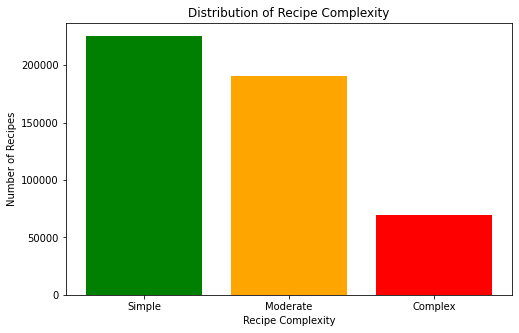

In [11]:
import matplotlib.pyplot as plt

# Ensure 'steps' column is properly parsed as a list
df_cleaned['steps'] = df_cleaned['steps'].apply(safe_eval)

# Calculate step count for each recipe
df_cleaned['step_count'] = df_cleaned['steps'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Define categories based on step count
def categorize_recipe(steps):
    if steps <= 5:
        return "Simple"
    elif 6 <= steps <= 10:
        return "Moderate"
    else:
        return "Complex"

df_cleaned['recipe_complexity'] = df_cleaned['step_count'].apply(categorize_recipe)

# Count of each complexity category
complexity_counts = df_cleaned['recipe_complexity'].value_counts()

# Plot distribution
plt.figure(figsize=(8, 5))
plt.bar(complexity_counts.index, complexity_counts.values, color=['green', 'orange', 'red'])
plt.xlabel("Recipe Complexity")
plt.ylabel("Number of Recipes")
plt.title("Distribution of Recipe Complexity")
plt.show()
